In [0]:
from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
test_path1='/content/gdrive/My Drive/datasets/prnnass2/Gamma_test.txt'
train_path1='/content/gdrive/My Drive/datasets/prnnass2/Gamma_train.txt'
test_path2='/content/gdrive/My Drive/datasets/prnnass2/Uniform_test.txt'
train_path2='/content/gdrive/My Drive/datasets/prnnass2/Uniform_train.txt'
test_path3='/content/gdrive/My Drive/datasets/prnnass2/Normal_test_10D.txt'
train_path3='/content/gdrive/My Drive/datasets/prnnass2/Normal_train_10D.txt'

In [0]:
import numpy as np, math,re,random
import scipy.spatial
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
...
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR, LogisticRegression as LogR 
from sklearn.feature_extraction.text import TfidfTransformer
#from pomegranate import *
from scipy.stats import expon
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
import re
from sklearn.neighbors import KNeighborsClassifier as kn

from sklearn.svm import SVR
%tensorflow_version 1.x
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
no_of_ele=0
def taking_data(c):
  global no_of_ele
  import re,numpy as np
  t=3
  if c==1:
    tp=train_path1
    testp=test_path1
  elif c==3:
    tp=train_path3
    testp=test_path3
    t=11
  else:
    tp=train_path2
    testp=test_path2
  with open(tp) as file:
      array2d = [[digit for digit in re.split(',|\n',line)] for line in file]
  matrix=[]
  for i in range(len(array2d)):
    temp=[]
    for j in range (t):
      temp.append(float(array2d[i][j]))
    matrix.append(temp)

  #print(matrix)
  matrix=np.array(matrix)
  no_of_ele=len(matrix)
  #print(no_of_ele)
  print(matrix.shape)
  import numpy as np, math,re
  with open(testp) as file:
      array2d = [[digit for digit in re.split(',|\n',line)] for line in file]
  matrix_test=[]
  for i in range(len(array2d)):
    temp=[]
    for j in range (t):
      temp.append(float(array2d[i][j]))
    matrix_test.append(temp)

  #print(matrix_test)
  matrix_test=np.array(matrix_test)
  #matrix_test.shape
  return t,matrix,matrix_test



In [0]:
import math
def random_gen(num):
  global no_of_ele
  ran=[]
  ran=random.sample(range(1, math.floor(no_of_ele/2)), num)
  return ran
# def gen_train_data(ran,matrix):
#     train_data=[]
#     for i in ran:
#         train_data.append(matrix[i])
#     return train_data




def gen_train_data(ran,matrix,d):
    train_data=[]
    positive=[]
    negative=[]
    for i in range(len(matrix)):
      if matrix[i][d]==1:
        positive.append(matrix[i])
      else:
        negative.append(matrix[i])
    for i in ran:
        train_data.append(positive[i])
        train_data.append(negative[i])
    return train_data
    

(2000, 3)
(500, 2)


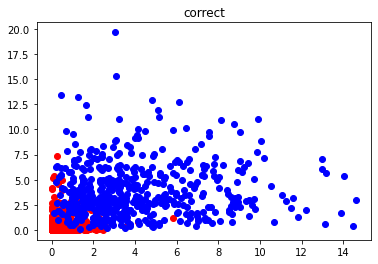

0.00022189999999999894
0.00112555
(616, 2)


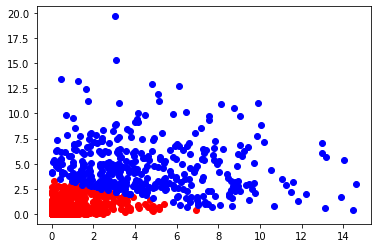

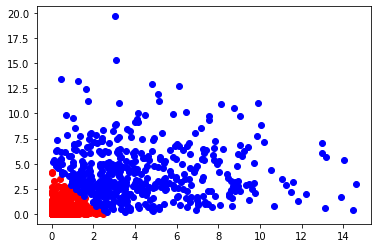

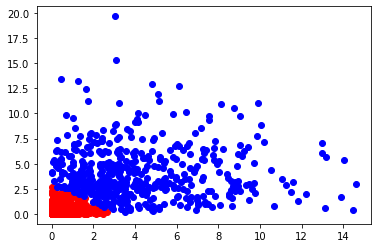

0.00019474999999999853
0.00011459999999999754
(602, 2)


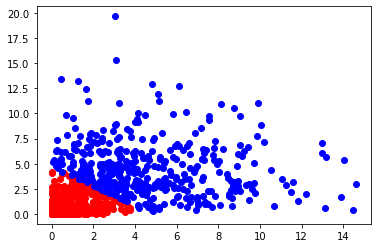

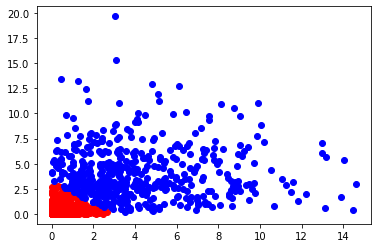

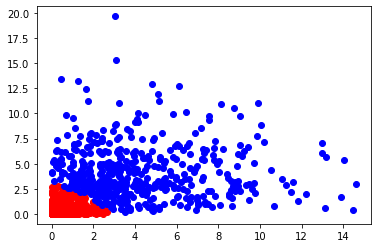

5.005000000000081e-05
7.7000000000001e-05
(601, 2)


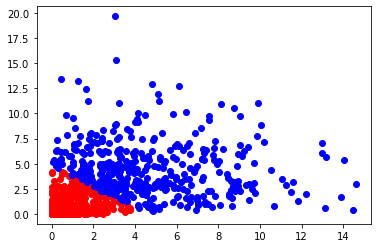

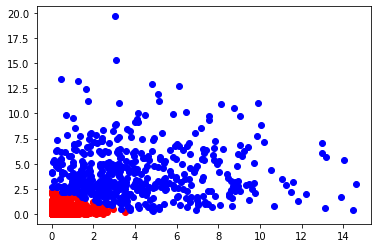

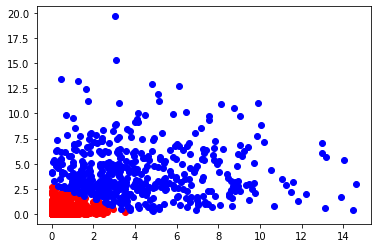

4.999999999999786e-06
0.00013989999999999852
(587, 2)


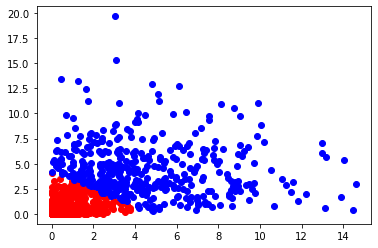

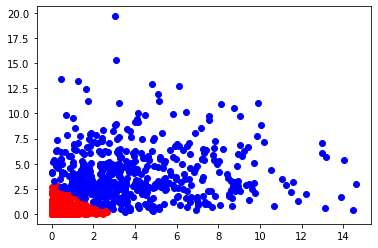

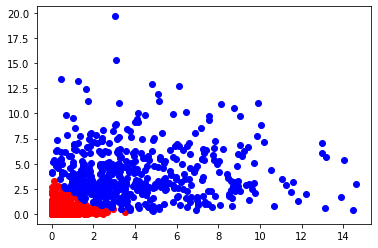

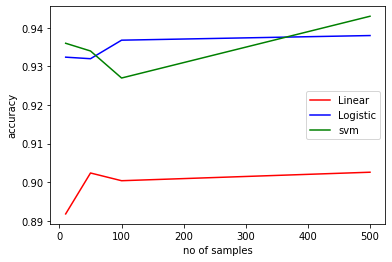

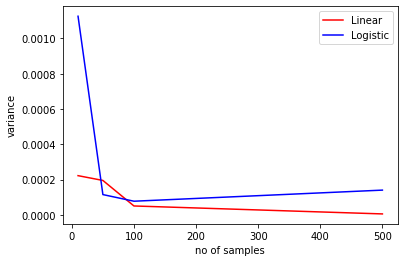

(2000, 3)
(500, 2)


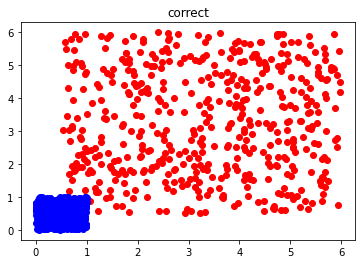

6.200000000000046e-05
0.0003496999999999967
(438, 2)


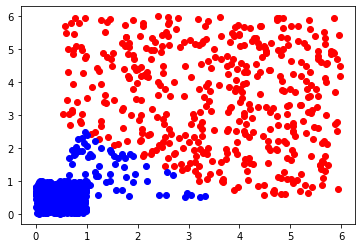

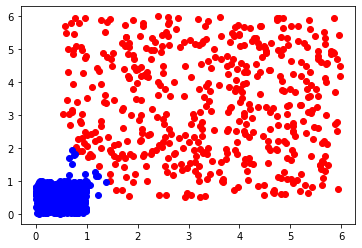

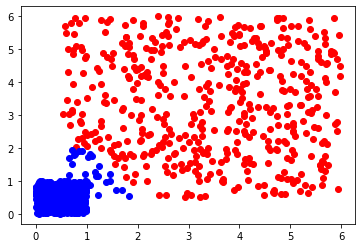

7.49999999999968e-07
0.00016799999999999796
(441, 2)


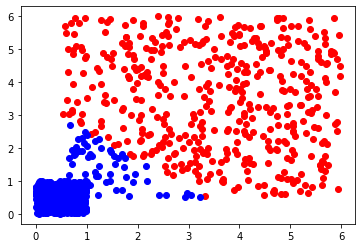

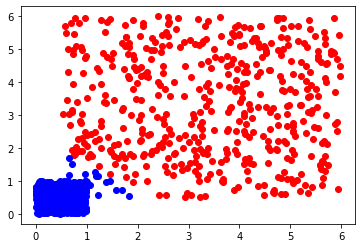

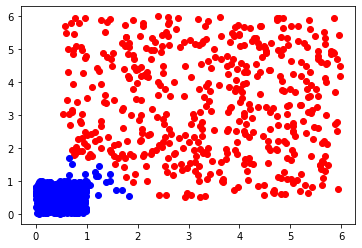

1.6000000000000382e-05
0.00017725000000000282
(440, 2)


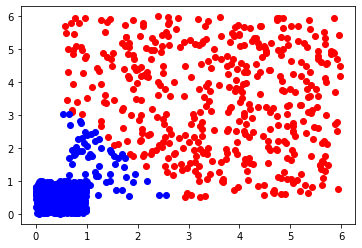

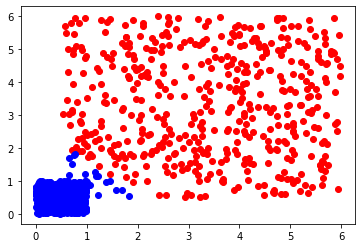

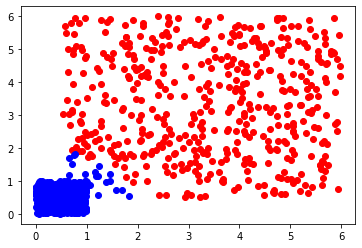

1.7000000000000032e-06
0.00013790000000000254
(429, 2)


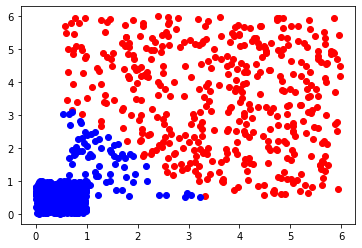

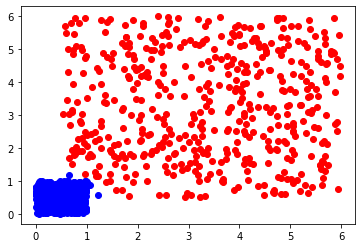

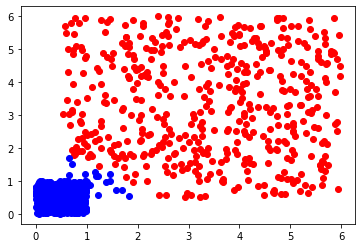

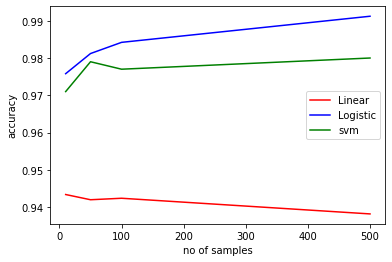

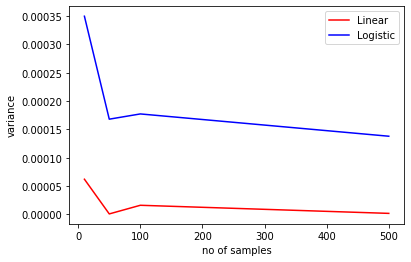

(2000, 11)
(508, 10)


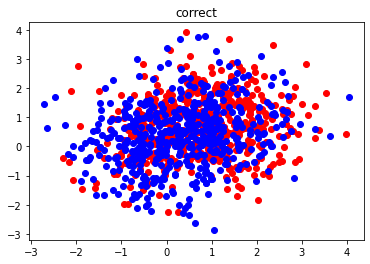

0.00036190000000000067
0.0062177499999999985
(470, 10)


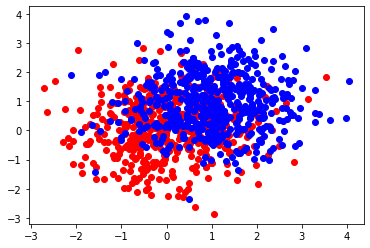

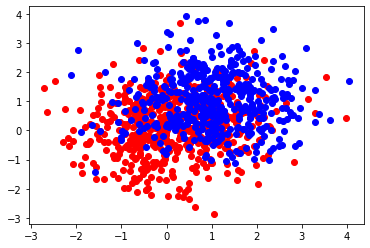

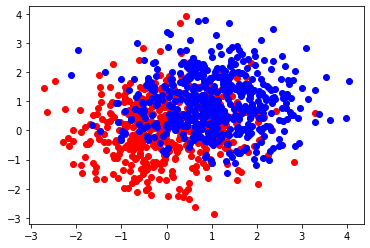

1.8850000000000045e-05
3.5999999999997843e-06
(495, 10)


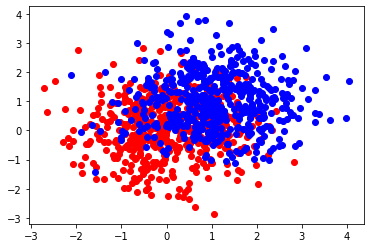

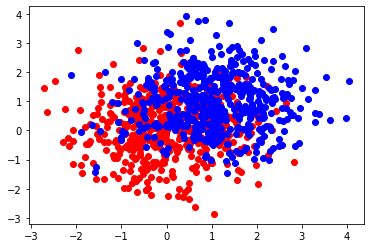

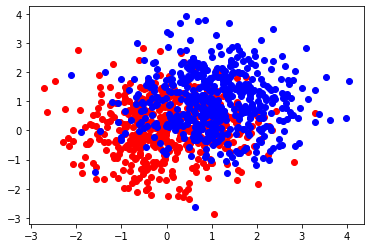

4.6699999999999875e-05
6.275000000000055e-05
(493, 10)


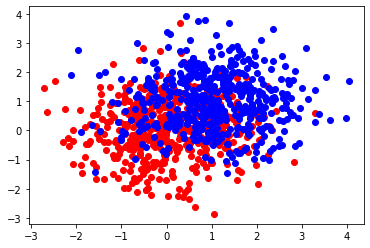

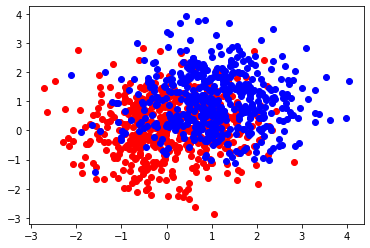

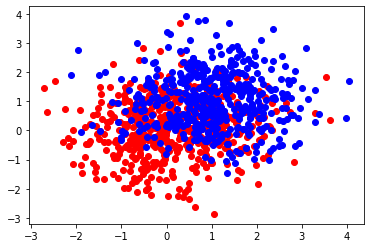

2.4499999999997817e-06
1.749999999999881e-06
(512, 10)


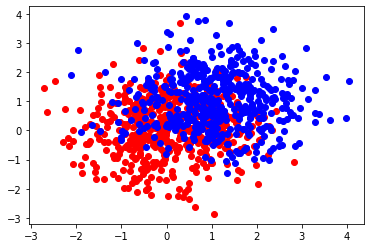

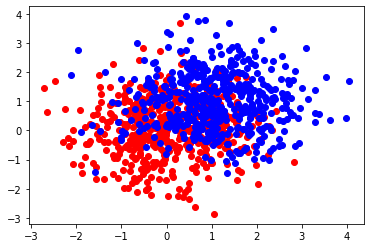

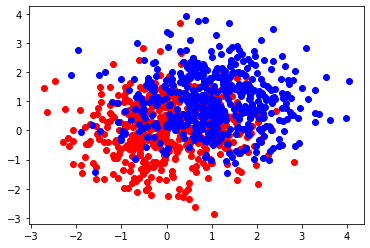

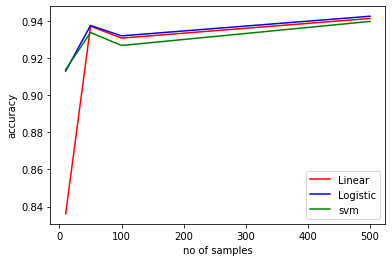

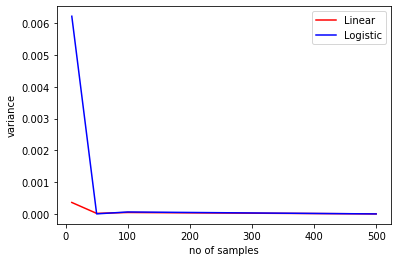

In [0]:
def least_sqvsLogistic(n):
    t,t_d,matrix_test=taking_data(n)
   # print("len of data"+str(no_of_ele))


    ppos=[]
    pneg=[]
  
    for z in range(len(matrix_test)):
      if matrix_test[z,2]>.5:
        ppos.append(matrix_test[z,:t-1])
      else:
        pneg.append(matrix_test[z,:t-1])
    
    
    ppos=np.array(ppos)
    
    pneg=np.array(pneg)
    
    print(ppos.shape)
    plt.scatter(ppos[:,0],ppos[:,1],color='red')
    plt.scatter(pneg[:,0],pneg[:,1],color='blue')
    plt.title('correct')
    plt.show()
        
    result=[]
    result2=[]
    result5=[]
    G=[10,50,100,500]
    v1=[]
    v2=[]
    d=len(t_d[0])-1
    for i in G:
        num1=random_gen(i)
        num2=random_gen(i)
        num3=random_gen(i)
        num4=random_gen(i)
        num5=random_gen(i)
        train_data1=gen_train_data(num1,t_d,d)
        train_data2=gen_train_data(num2,t_d,d)
        train_data3=gen_train_data(num3,t_d,d)
        train_data4=gen_train_data(num4,t_d,d)
        train_data5=gen_train_data(num5,t_d,d)
        # train_data=[]
        # for j in range(i):
        #   train_data.append((train_data1[j]+train_data2[j]+train_data3[j]+train_data4[j]+train_data5[j])/5)

        train_data1=np.array(train_data1)
        train_data2=np.array(train_data2)
        train_data3=np.array(train_data3)
        train_data4=np.array(train_data4)
        train_data5=np.array(train_data5)



        #print(train_data.shape)
        y_pred01 = LR().fit(X=train_data1[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred02 = LR().fit(X=train_data2[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred03 = LR().fit(X=train_data3[:,:t-1],y=train_data3[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred04 = LR().fit(X=train_data4[:,:t-1],y=train_data4[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred05 = LR().fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred21=[]
        y_pred22=[]
        y_pred23=[]
        y_pred24=[]
        y_pred25=[]

        for z in y_pred01:
          if z>0:
            y_pred21.append(1)
          else:
            y_pred21.append(-1)
        for z in y_pred02:
          if z>0:
            y_pred22.append(1)
          else:
            y_pred22.append(-1)

        for z in y_pred03:
          if z>0:
            y_pred23.append(1)
          else:
            y_pred23.append(-1)
        for z in y_pred04:
          if z>0:
            y_pred24.append(1)
          else:
            y_pred24.append(-1)
        for z in y_pred05:
          if z>0:
            y_pred25.append(1)
          else:
            y_pred25.append(-1)
        y_pred11=LogR().fit(X=train_data1[:,:t-1],y=train_data1[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred12=LogR().fit(X=train_data2[:,:t-1],y=train_data2[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred13=LogR().fit(X=train_data3[:,:t-1],y=train_data3[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred14=LogR().fit(X=train_data4[:,:t-1],y=train_data4[:,t-1]).predict(matrix_test[:,:t-1])
        y_pred15=LogR().fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])
        
        y_pred51=SVR().fit(X=train_data5[:,:t-1],y=train_data5[:,t-1]).predict(matrix_test[:,:t-1])

        y_pred52=[]
        for z in y_pred51:
          if z>0:
            y_pred52.append(1)
          else:
            y_pred52.append(-1)
        #print(matrix_test[500:550,2])
        #print(y_pred[500:550])
        res11=1-(((matrix_test[:,t-1] != y_pred11).sum())/len(matrix_test))
        res12=1-(((matrix_test[:,t-1] != y_pred12).sum())/len(matrix_test))
        res13=1-(((matrix_test[:,t-1] != y_pred13).sum())/len(matrix_test))
        res14=1-(((matrix_test[:,t-1] != y_pred14).sum())/len(matrix_test))
        res15=1-(((matrix_test[:,t-1] != y_pred15).sum())/len(matrix_test))
        res21=1-(((matrix_test[:,t-1] != y_pred21).sum())/len(matrix_test))
        res22=1-(((matrix_test[:,t-1] != y_pred22).sum())/len(matrix_test))
        res23=1-(((matrix_test[:,t-1] != y_pred23).sum())/len(matrix_test))
        res24=1-(((matrix_test[:,t-1] != y_pred24).sum())/len(matrix_test))
        res25=1-(((matrix_test[:,t-1] != y_pred25).sum())/len(matrix_test))
        res5=res25=1-(((matrix_test[:,t-1] != y_pred52).sum())/len(matrix_test))
        
        
        res1=(res11+res12+res13+res14+res15)/5
        res2=(res21+res22+res23+res24+res25)/5

        var1=((res11-res1)**2+(res12-res1)**2+(res13-res1)**2+(res14-res1)**2+(res11-res1)**2)/4
        var2=((res21-res2)**2+(res22-res2)**2+(res23-res2)**2+(res24-res2)**2+(res21-res2)**2)/4
        print(var1)
        print(var2)
        v1.append(var1)
        v2.append(var2)

        ppos=[]
        pneg=[]
        qpos=[]
        qneg=[]
        zpos=[]
        zneg=[]
        # from sklearn.decomposition import PCA
        # pca=PCA(n_components=2) 
        # if n==3:
        #   matrix_test

        for z in range(len(y_pred22)):
          if y_pred22[z]>0:
            ppos.append(matrix_test[z,:t-1])
          else:
            pneg.append(matrix_test[z,:t-1])
        for z in range(len(y_pred11)):
          if y_pred11[z]>0:
            qpos.append(matrix_test[z,:t-1])
          else:
            qneg.append(matrix_test[z,:t-1])
        for z in range(len(y_pred52)):
          if y_pred52[z]>0:
            zpos.append(matrix_test[z,:t-1])
          else:
            zneg.append(matrix_test[z,:t-1])
        
  
        ppos=np.array(ppos)
        qpos=np.array(qpos)
        pneg=np.array(pneg)
        qneg=np.array(qneg)
        zpos=np.array(zpos)
        zneg=np.array(zneg)
        print(ppos.shape)
        if len(ppos)>0:
          plt.scatter(ppos[:,0],ppos[:,1],color='red')
        if len(pneg)>0:
          plt.scatter(pneg[:,0],pneg[:,1],color='blue')
        plt.show()
        if len(qpos)>0:
          plt.scatter(qpos[:,0],qpos[:,1],color='red')
        if len(qneg)>0:
          plt.scatter(qneg[:,0],qneg[:,1],color='blue')
        plt.show()
        if len(zpos)>0:
          plt.scatter(zpos[:,0],zpos[:,1],color='red')
        if len(zneg)>0:
          plt.scatter(zneg[:,0],zneg[:,1],color='blue')
        plt.show()
        #plt.plot(G,result2,color='blue')
        # plt.legend([str,'Logistic'])
        # plt.xlabel('no of samples')
        # plt.ylabel('accuracy')


        result2.append(res1)
        result.append(res2)
        result5.append(res5)
       # result2.append(1-((matrix_test[:,2] != y_pred1).sum())/len(matrix_test))
    
    plt.plot(G,result,color='red')
    plt.plot(G,result2,color='blue')
    plt.plot(G,result5,color='green')
    plt.legend(['Linear','Logistic','svm'])
    plt.xlabel('no of samples')
    plt.ylabel('accuracy')


    plt.show()
    plt.plot(G,v1,color='red')
    plt.plot(G,v2,color='blue')
    plt.legend(['Linear','Logistic'])
    plt.xlabel('no of samples')
    plt.ylabel('variance')


    plt.show()

for i in range(1,4):
  least_sqvsLogistic(i)

In [0]:
ran=random_gen(50)
#print(ran)
train_data=(ran,matrix)
train_data=np.array(train_data[1])

LR().fit(X=train_data[:,:2],y=train_data[:,2])
LogR().fit(X=train_data[:,:2],y=train_data[:,2])